In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('../mystyle.mplstyle')

`````{admonition} Remark
:class: important

Please be aware that these lecture notes are accessible online in an '**early access**' format. They are actively being developed, and certain sections will be further enriched to provide a comprehensive understanding of the subject matter.

`````

# Azimuthal Projections

Azimuthal projections map the Earth's surface onto a plane, typically touching the globe at a single point. These projections are often used for polar regions and can preserve either distances or directions from the center point. The Stereographic projection is a notable example, allowing for accurate representation of circular areas around the point of contact {cite}`kumar2023geographic, mchaffie2023gis`.

## Mathematical Formulation

The azimuthal equidistant projection maps points from a sphere (or spheroid) to a plane. The formulation involves two steps: first, calculating polar coordinates on the plane, and then converting these to Cartesian coordinates {cite}`wiki_azimuthal_2024, kumar2023geographic, mchaffie2023gis`.

1. **Spherical to Polar Coordinates:** For a center point ($\phi_0$, $\lambda_0$) and a point to be projected ($\phi$, $\lambda$), we first calculate polar coordinates ($\rho$, $\theta$):

   \begin{equation}
   \begin{cases}
   \cos \dfrac{\rho}{R} &= \sin \phi_0 \sin \phi + \cos \phi_0 \cos \phi \cos (\lambda - \lambda_0) \\&\\
   \tan \theta &= \dfrac{\cos \phi \sin (\lambda - \lambda_0)}{\cos \phi_0 \sin \phi - \sin \phi_0 \cos \phi \cos (\lambda - \lambda_0)}
   \end{cases}
   \end{equation}

   where:
   - $R$ is the radius of the Earth
   - $\rho$ is the radial distance on the plane from the center point
   - $\theta$ is the angle on the plane from the vertical (azimuth)
   - $\phi$ and $\lambda$ are latitude and longitude of the point to be projected
   - $\phi_0$ and $\lambda_0$ are latitude and longitude of the center point

2. **Polar to Cartesian Coordinates:** The polar coordinates are then converted to Cartesian coordinates (x, y) on the plane:

   \begin{equation}
   \begin{cases}
   x &= \rho \sin \theta \\&\\
   y &= -\rho \cos \theta
   \end{cases}
   \end{equation}


When the projection is centered on the North Pole, we have a special case where $\phi_0 = \frac{\pi}{2}$ and $\lambda_0$ can be arbitrarily set to 0. This simplifies the equations significantly:

\begin{equation}
\begin{cases}
\rho &= R \left(\dfrac{\pi}{2} - \phi \right) \\&\\
\theta &= \lambda
\end{cases}
\end{equation}

In this case:
- $\rho$ is directly proportional to the co-latitude $\left( \dfrac{\pi}{2} - \phi \right)$
- $\theta$ is simply the longitude $\lambda$

This simplification makes calculations much easier for North Pole-centered projections, which is why they are often used for Arctic maps.

These equations ensure that:
1. The distance from the center point to any other point on the map is proportional to the great circle distance on the sphere.
2. The direction (azimuth) from the center point to any other point is preserved.

The complexity of the general case equations reflects the challenge of maintaining these properties for any chosen center point on the globe.

{numref}`figure_Azimuthal_equidistant_projection_SW` shows a map of the Earth using the **azimuthal equidistant projection** centered on the North Pole. Key features include:

- **Central Point**: The North Pole is the center of the map.
- **Distance and Direction**: Distances from the North Pole to any other point on the map are proportionally correct, and directions from the North Pole are accurately represented.
- **Coverage**: The map extends all the way to the South Pole, showing all continents and oceans.
- **Distortion**: Distortion increases as you move away from the center, especially near the edges. This is due to the increasing angular distance $c$ from the center point.

```{figure} Azimuthal_equidistant_projection_SW.jpg
---
width: 600px
align: center
name: figure_Azimuthal_equidistant_projection_SW
---
Azimuthal Equidistant Projection Centered on the North Pole: This map extends from the North Pole to the South Pole, accurately representing distances and directions from the center point. Credit: [Wikipedia.org](https://en.wikipedia.org/wiki/Azimuthal_equidistant_projection). [Link to Image](https://en.wikipedia.org/wiki/Azimuthal_equidistant_projection#/media/File:Azimuthal_equidistant_projection_SW.jpg).
```

This projection is useful for applications like radio and seismic mapping, where accurate distances from a central point are crucial. The mathematical formulation ensures that the distance from the center to any point on the map is proportional to the great circle distance on the Earth's surface, while maintaining true direction from the center point.

````{prf:example}
:label: example2.8.1

Let's demonstrate the Azimuthal Equidistant projection using the coordinates of Calgary, located at approximately 51.0447° N latitude and 114.0719° W longitude:

1. **Set up projection parameters:**
   - Reference point (latitude, longitude): (51.0447°, -114.0719°)
   - Earth's radius (R): 6,371 km

2. **Convert Degrees to Radians:**
   \begin{align*}
   \lambda &= -114.0719° \times \frac{\pi}{180} = -1.9909 \text{ radians} \\
   \phi &= 51.0447° \times \frac{\pi}{180} = 0.8909 \text{ radians} \\
   \lambda_0 &= \lambda = -1.9909 \text{ radians} \\
   \phi_0 &= \phi = 0.8909 \text{ radians}
   \end{align*}

3. **Calculate distance and azimuthal angles:**
   \begin{align*}
   \Delta\lambda &= \lambda - \lambda_0 = -1.9909 - (-1.9909) = 0 \text{ radians} \\
   \cos(c) &= \sin(\phi_0) \sin(\phi) + \cos(\phi_0) \cos(\phi) \cos(\Delta\lambda) \\
   &= \sin(0.8909) \sin(0.8909) + \cos(0.8909) \cos(0.8909) \cos(0) \\
   &= 1 \\
   c &= \arccos(1) = 0 \text{ radians} \\
   \end{align*}

4. **Calculate x and y coordinates:**
   \begin{align*}
   x &= R c \cos(\phi) \sin(\Delta\lambda) \\
   &= 6,371 \times 0 \times \cos(0.8909) \times \sin(0) \\
   &= 0 \text{ km}
   \end{align*}

   \begin{align*}
   y &= R c \left(\cos(\phi_0) \sin(\phi) - \sin(\phi_0) \cos(\phi) \cos(\Delta\lambda)\right) \\
   &= 6,371 \times 0 \times \left(\cos(0.8909) \sin(0.8909) - \sin(0.8909) \cos(0.8909) \cos(0)\right) \\
   &= 0 \text{ km}
   \end{align*}

The coordinates (x = 0 km, y = 0 km) confirm that Calgary is at the origin of this projection, as expected.

{numref}`calgary_azimuthal_equidistant` illustrates Calgary's location using an Azimuthal Equidistant projection centered on Calgary.

```{figure} calgary_azimuthal_equidistant.png
---
align: center
name: calgary_azimuthal_equidistant
---
Calgary's location shown in an Azimuthal Equidistant projection.
```

In [2]:
import numpy as np

# 1. Set up projection parameters
calgary_lat = 51.0447
calgary_lon = -114.0719
R = 6371  # Earth's radius in km

print("1. Projection parameters:")
print(f"   Reference point (latitude, longitude): ({calgary_lat}°, {calgary_lon}°)")
print(f"   Earth's radius: {R} km")
print()

# 2. Convert Degrees to Radians
lambda_rad = np.radians(calgary_lon)
phi_rad = np.radians(calgary_lat)
lambda0_rad = lambda_rad
phi0_rad = phi_rad

print("2. Convert Degrees to Radians:")
print(f"   λ = {lambda_rad:.4f} radians")
print(f"   φ = {phi_rad:.4f} radians")
print(f"   λ0 = {lambda0_rad:.4f} radians")
print(f"   φ0 = {phi0_rad:.4f} radians")
print()

# 3. Calculate distance and azimuthal angles
delta_lambda = lambda_rad - lambda0_rad
cos_c = np.sin(phi0_rad) * np.sin(phi_rad) + np.cos(phi0_rad) * np.cos(phi_rad) * np.cos(delta_lambda)
c = np.arccos(np.clip(cos_c, -1, 1))  # clip to handle floating point errors

print("3. Calculate distance and azimuthal angles:")
print(f"   Δλ = {delta_lambda:.4f} radians")
print(f"   cos(c) = {cos_c:.4f}")
print(f"   c = {c:.4f} radians")
print()

# 4. Calculate x and y coordinates
x = R * c * np.cos(phi_rad) * np.sin(delta_lambda)
y = R * c * (np.cos(phi0_rad) * np.sin(phi_rad) - np.sin(phi0_rad) * np.cos(phi_rad) * np.cos(delta_lambda))

print("4. Calculate x and y coordinates:")
print(f"   x = {x:.4f} km")
print(f"   y = {y:.4f} km")

1. Projection parameters:
   Reference point (latitude, longitude): (51.0447°, -114.0719°)
   Earth's radius: 6371 km

2. Convert Degrees to Radians:
   λ = -1.9909 radians
   φ = 0.8909 radians
   λ0 = -1.9909 radians
   φ0 = 0.8909 radians

3. Calculate distance and azimuthal angles:
   Δλ = 0.0000 radians
   cos(c) = 1.0000
   c = 0.0000 radians

4. Calculate x and y coordinates:
   x = 0.0000 km
   y = 0.0000 km


In [3]:
import numpy as np
from pyproj import Proj, transform

def azimuthal_equidistant_calc(lat, lon, lat0, lon0, R=6371):
    # Convert to radians
    lat, lon, lat0, lon0 = map(np.radians, [lat, lon, lat0, lon0])
    
    # Calculate differences
    dlam = lon - lon0
    
    # Calculate c
    cos_c = np.sin(lat0) * np.sin(lat) + np.cos(lat0) * np.cos(lat) * np.cos(dlam)
    c = np.arccos(np.clip(cos_c, -1, 1))  # clip to handle floating point errors
    
    # Calculate k
    k = c / np.sin(c) if c != 0 else 1
    
    # Calculate x and y
    x = R * k * np.cos(lat) * np.sin(dlam)
    y = R * k * (np.cos(lat0) * np.sin(lat) - np.sin(lat0) * np.cos(lat) * np.cos(dlam))
    
    return x, y

# Calgary's coordinates
calgary_lat, calgary_lon = 51.0447, -114.0719

# Calculate for Calgary (should be 0, 0)
x, y = azimuthal_equidistant_calc(calgary_lat, calgary_lon, calgary_lat, calgary_lon)
print(f"Calgary coordinates: x = {x:.4f} km, y = {y:.4f} km")

# Calculate for a point slightly offset from Calgary
offset_lat, offset_lon = 51.1, -114.1
x, y = azimuthal_equidistant_calc(offset_lat, offset_lon, calgary_lat, calgary_lon)
print(f"Offset point coordinates: x = {x:.4f} km, y = {y:.4f} km")

# Verify with pyproj
aeqd = Proj(proj='aeqd', lat_0=calgary_lat, lon_0=calgary_lon, R=6371)
x_proj, y_proj = aeqd(offset_lon, offset_lat)
print(f"Pyproj result: x = {x_proj:.4f} km, y = {y_proj:.4f} km")

# Calculate difference
diff_x = abs(x - x_proj)
diff_y = abs(y - y_proj)
print(f"Difference: dx = {diff_x:.4f} km, dy = {diff_y:.4f} km")

Calgary coordinates: x = 0.0000 km, y = 0.0000 km
Offset point coordinates: x = -1.9621 km, y = 6.1495 km
Pyproj result: x = -1.9621 km, y = 6.1495 km
Difference: dx = 0.0000 km, dy = 0.0000 km


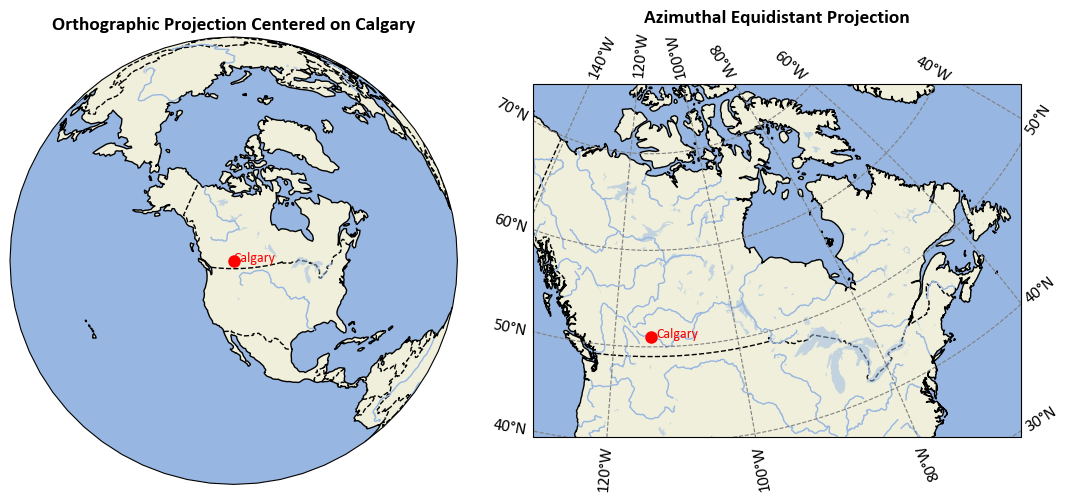

In [4]:
# calgary_azimuthal_equidistant
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and Longitude of Calgary
latitude_deg = 51.0447
longitude_deg = -114.0719

# Create a figure
fig = plt.figure(figsize=(11, 5))

# Left plot: Orthographic Projection
ax1 = fig.add_subplot(121, projection=ccrs.Orthographic(central_longitude=longitude_deg, central_latitude=latitude_deg))
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='--')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)

# Plot Calgary on the globe
ax1.plot(longitude_deg, latitude_deg, marker='o', color='red', markersize=8, transform=ccrs.Geodetic())
ax1.text(longitude_deg, latitude_deg, 'Calgary', color='red', transform=ccrs.Geodetic())

ax1.set_global()
ax1.set_title('Orthographic Projection Centered on Calgary', fontsize=14)

# Right plot: Lambert Conformal Conic Projection
ax2 = fig.add_subplot(122, projection=ccrs.AzimuthalEquidistant(central_longitude=longitude_deg, central_latitude=latitude_deg))

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces_lines',
                                                scale='50m',
                                                facecolor='none')

ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='--')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.RIVERS)
# ax2.add_feature(states_provinces, edgecolor='gray')

# Plot Calgary on the map
ax2.plot(longitude_deg, latitude_deg, marker='o', color='red', markersize=8, transform=ccrs.Geodetic())
ax2.text(longitude_deg + 1, latitude_deg, 'Calgary', color='red', transform=ccrs.Geodetic())

ax2.set_extent([-130, -60, 40, 70], crs=ccrs.PlateCarree())
# Add gridlines with enlarged labels
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.xlabel_style = {'size': 12}  # Adjust the font size for x-axis labels
gl.ylabel_style = {'size': 12}  # Adjust the font size for y-axis labels

ax2.set_title('Azimuthal Equidistant Projection', fontsize=14)

plt.tight_layout()
plt.savefig('calgary_azimuthal_equidistant.png', dpi=300, bbox_inches='tight')

````{prf:example}
:label: example2.8.2

Building on our previous visualization, for Calgary (51.0447° N, 114.0719° W), let's extend the map extent to showcase the characteristics of the Azimuthal Equidistant projection:

1. **Projection Parameters**:
   - Central longitude ($\lambda_0$): -114.0719°
   - Central latitude ($\phi_0$): 51.0447°
   - Earth's radius (R): 6,371 km

2. **Projection Characteristics**:
   - The Azimuthal Equidistant projection preserves distances from the central point (Calgary) to any other point on the map.
   - Distortion increases as the distance from the center increases, particularly near the edges of the map.

To visualize the broader context of Calgary's position, we extend the map to cover the entire Northern Hemisphere, from the equator (0°) to the North Pole (90°N), and across all longitudes (-180° to 180°).

{numref}`azimuthal_equidistant_extended` illustrates this extended Azimuthal Equidistant projection:

```{figure} calgary_azimuthal_equidistant_extended.png
---
width: 600px
align: center
name: azimuthal_equidistant_extended
---
Extended Azimuthal Equidistant projection centered on Calgary, showing distances from Calgary to the edges of the Northern Hemisphere.
```

The extended projection shows:
- A circular map centered on Calgary, with all points radiating outward from this central location.
- Meridians (lines of longitude) radiating outwards from Calgary.
- Parallels (lines of latitude) as concentric circles around Calgary.
- The equator forming the outermost circle of the map.
- The North Pole is represented as a point at the center-top of the map.

**Key Differences from Previous Example:**
   - **Scale:** The extended map now covers a vast area, providing a comprehensive view of distances from Calgary to other points in the Northern Hemisphere.
   - **Shape:** Instead of a globe-like representation, the map is now a circular projection centered on Calgary.
   - **Distortion:** While distances from Calgary are preserved, distortion becomes significant towards the map's edge, particularly near the equator.
   - **Context:** Calgary's central position is now shown in relation to the entire Northern Hemisphere, offering a clear view of how distances expand outward from the city.

**Interpreting the Extended Projection:**
   - The map emphasizes the equidistant property of the projection, where the distance from Calgary to any other point is accurately represented.
   - Distortion near the outer edges is evident, reflecting the limitations of this projection for global-scale mapping.
   - The map is particularly useful for applications where accurate distance measurement from a central point (Calgary) is essential, such as in aviation or telecommunications.
   - The circular layout underscores the equidistant nature, showing how Calgary is positioned relative to other locations across the Northern Hemisphere.



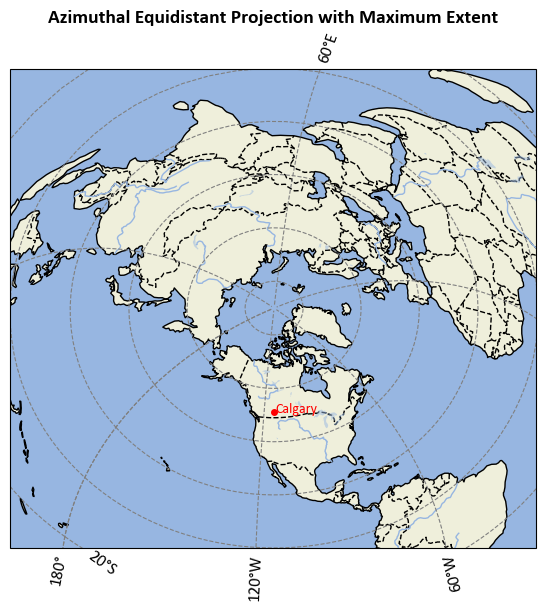

In [5]:
# calgary_azimuthal_equidistant_extended
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and Longitude of Calgary
latitude_deg = 51.0447
longitude_deg = -114.0719

# Create a figure
fig = plt.figure(figsize=(10, 6))

# Lambert Conformal Conic Projection
ax = fig.add_subplot(111, projection=ccrs.AzimuthalEquidistant(central_longitude=longitude_deg, central_latitude=latitude_deg))
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot Calgary on the map
ax.plot(longitude_deg, latitude_deg, marker='o', color='red', markersize=4, transform=ccrs.Geodetic())
ax.text(longitude_deg + 1, latitude_deg, 'Calgary', color='red', transform=ccrs.Geodetic())

# Set maximum extent to cover a large area
ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())  # Maximum extent covering the entire globe
# Add gridlines with enlarged labels
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.xlabel_style = {'size': 12}  # Adjust the font size for x-axis labels
gl.ylabel_style = {'size': 12}  # Adjust the font size for y-axis labels
ax.set_title('Azimuthal Equidistant Projection with Maximum Extent', fontsize=14)

plt.tight_layout()
plt.savefig('calgary_azimuthal_equidistant_extended.png', dpi=300, bbox_inches='tight')

## Choosing the Right Projection

The choice of a map projection depends on the purpose of the map:
- **Preserving Area**: Equal-area projections, like the Albers Equal Area, maintain the relative size of areas across the map.
- **Preserving Shape**: Conformal projections, like the Lambert Conformal Conic, maintain the shape of small areas.
- **Preserving Distance**: Equidistant projections maintain accurate distances from certain points or along certain lines.
- **Preserving Direction**: Azimuthal projections can maintain accurate directions from the central point to any other point on the map.

## The Impact of Projections

The selection of a map projection can influence how we perceive spatial relationships and can have implications for everything from navigation to political perceptions. For example, the size distortion of the Mercator projection has been criticized for giving an inflated sense of the size of higher-latitude countries.